In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
seoulbike = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')
seoulbike.head() 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
#creating a 'time_of_day' column based on the hour
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

#applying the function to categorize each hour
seoulbike['Time of the Day'] = seoulbike['Hour'].apply(get_time_of_day)

#calculating the average rentals grouped by season and time_of_day
avg_rentals = seoulbike.groupby(['Seasons', 'Time of the Day'])['Rented Bike Count'].mean().reset_index()

avg_rentals 

,Seasons,Time of the Day,Rented Bike Count
0,Autumn,Afternoon,1039.785714
1,Autumn,Evening,759.133700
2,Autumn,Morning,720.338828
3,Spring,Afternoon,986.175725
4,Spring,Evening,654.612319
5,Spring,Morning,624.724638
6,Summer,Afternoon,1061.836957
7,Summer,Evening,1101.513587
8,Summer,Morning,871.429348
9,Winter,Afternoon,295.485185


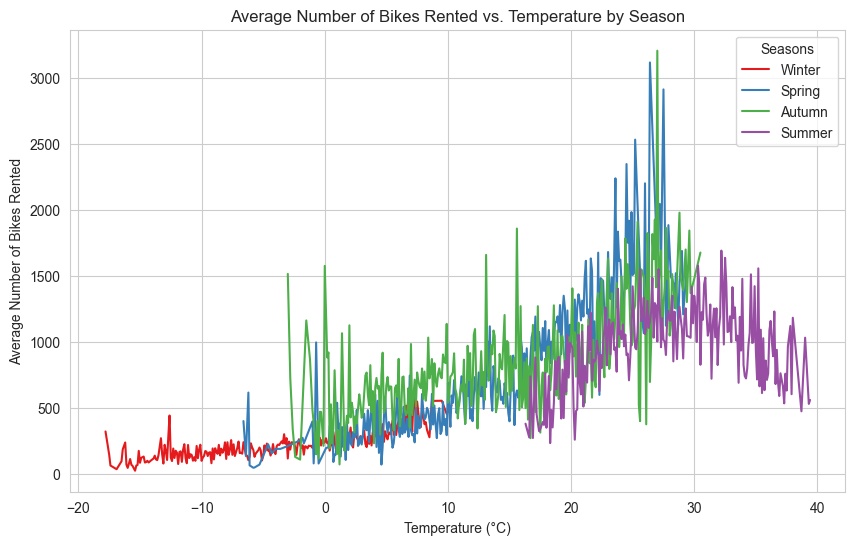

In [24]:
#aggregating data to find the average Rented Bike Count for each temperature by Seasons
avg_rentals_temp = seoulbike.groupby(['Temperature(°C)', 'Seasons'])['Rented Bike Count'].mean().reset_index()

#creating line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_rentals_temp, x='Temperature(°C)', y='Rented Bike Count', hue='Seasons', palette='Set1')

#adding plot labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Number of Bikes Rented')
plt.title('Average Number of Bikes Rented vs. Temperature by Season')

#displaying the plot
plt.legend(title='Seasons')
plt.show()


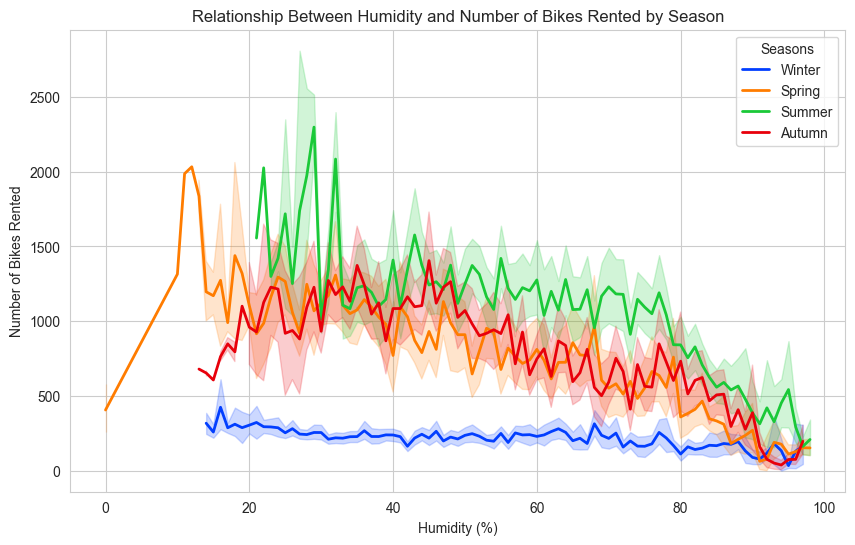

In [26]:
#creating visuals based on Humidity and the Number of Bikes by the season
plt.figure(figsize=(10, 6))
sns.lineplot(data=seoulbike, x='Humidity(%)', y='Rented Bike Count', hue='Seasons', palette='bright', linewidth=2) 
plt.xlabel('Humidity (%)')
plt.ylabel('Number of Bikes Rented')
plt.title('Relationship Between Humidity and Number of Bikes Rented by Season')
plt.legend(title='Seasons')

plt.show() 

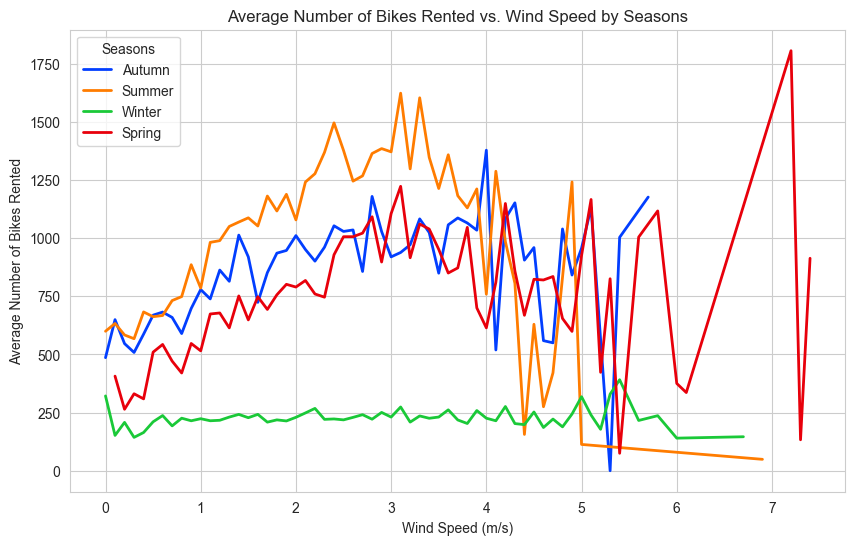

In [18]:
#creating visuals to find the average Rented Bike Count for each wind speed by Seasons
avg_wind = seoulbike.groupby(['Wind speed (m/s)', 'Seasons'])['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_wind, x='Wind speed (m/s)', y='Rented Bike Count', hue='Seasons', palette='bright', linewidth=2)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Average Number of Bikes Rented')
plt.title('Average Number of Bikes Rented vs. Wind Speed by Seasons')
plt.legend(title='Seasons') 

plt.show()


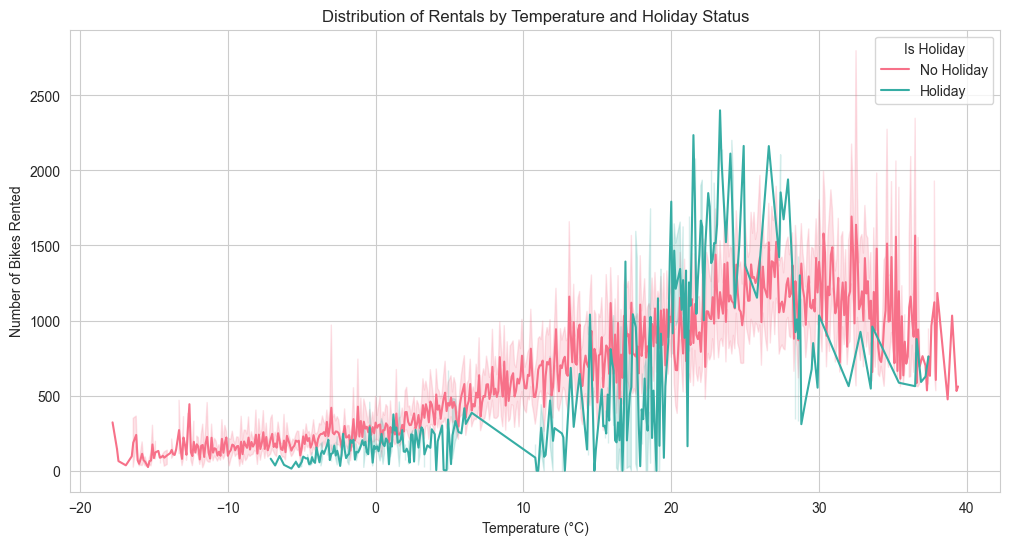

In [23]:
#creating visuals to display the Distribution of Rentals by Temperature and Holiday Status
plt.figure(figsize=(12, 6))
sns.lineplot(data=seoulbike, x='Temperature(°C)', y='Rented Bike Count', hue='Holiday', palette='husl', linewidth=1.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Bikes Rented')
plt.title('Distribution of Rentals by Temperature and Holiday Status')
plt.legend(title='Is Holiday')
plt.show() 